# =======64일차 =========
- 수업듣기 : 4월 20일

In [59]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import plot_model

In [60]:
# 텐서플로우 버전확인  
tf.__version__ # '2.0.0' 

# keras 버전 확인 
keras.__version__ # '2.2.4-tf' 

'2.2.4-tf'

In [61]:
# 0. 데이터 확인 
# MNIST , 케라스에 내장된 데이터 가져오기 
# train, test 나눠서 튜플로 묶어서 준다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 타입확인 
type(X_train), type(y_train) # numpy.ndarray 형태로 넘어온다. 

# 갯수 확인 ==> 각각의 축이 무엇을 의미하는지 알아야 한다. 
X_train.shape, X_test.shape # ((60000, 28, 28), (10000, 28, 28)) --> (이미지갯수, height, width)
# 칼라이미지 --> (이미지갯수, height, width, cannel(RGB칼라농도)) : 칼라는 4차원이 된다.  

# 첫번째 데이터 확인 
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

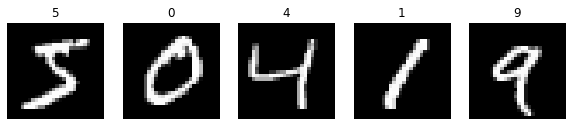

In [62]:
# 데이터 plt으로 확인해보기 
plt.figure(figsize = (10,10))

for i in range(5): # 5개 이미지 확인 
    plt.subplot(1, 5, i+1) # 한줄에 5개를 그리겠다. (위치지정)
    plt.imshow(X_train[i], cmap ='gray') # imshow 픽셀을 이미지로 보여줘라, cmap칼라맵을 그레이모드로 
    plt.title(y_train[i]) 
    plt.axis('off') # 틱 안나오게 
    
plt.show()

# 1) 신경망(딥러닝) 모델 정의 / 구현 
- 3가지 방법중에 시퀀셜 방식으로 구현해보자.
- 네트워크를 만들어보자 --> 레이어들을 모아둔 것 ==> 네트워크 
    - 1) 모델의 틀을 만들다. 
    - 2) Input layer 
    - 3) Flatten layer 
    - 4) Dense layer 
    
    
* 로지스틱 리그레션 : 입력값이 들어오면 각 피체에 따라 가중치를 곱한 뒤 더한 값들 
    - ax + b 이런 형태 ==> 리니어 리그레션
    - x1w1 + x2w2 + x3w3 + ... 
    - 선형회귀를 위해서 시그모이드 --> 0~1사이로 나오게 해준다. 
    - 0.5를 기준으로 작으면 0, 크면 1로 구분한다. 


- 딥러닝은 로지스틱 리그레션을 n개를 만든다. 
    - 지정한 갯수만큼 로지스틱 리그레션을 만들다. 
    
    
- 층을 왜 여러개 만드냐?
    - 패턴을 찾기 위해서 모델을 만드는 거잖아?  
    - 각각의 패턴을 찾기 위해서 레이어를 여러개 나눠서 찾는 형태 ==> 유닛, 노드, 뉴런 이라고 한다. 
    - 예를들면 1번에서는 A패턴을 찾고, 2번에서는 B패턴을 찾고 --> 이 패턴을 찾는 작업은 은닉층에서 패턴을 찾는 작업을 한다.  
    - 마지막은 출력층이니 예측하는 모델이다.
    
    
- activation 은 무엇을 의미하나?
    - 시그모이드 함수 대신에 렐루 함수를 쓰겠다. 라는 의미
    - 렐루 함수 : max(0,x) 큰것을 반환한다. 음수를 0으로 반환 , 양수는 양수 반환 
    - 소프트맥스 : 마지막 출력층은 예측한 값이 나온다. 10은 출력값의 갯수이다. 우리가 맞추려는 것이 0~9에서 10개중에 뭐니? 를 맞추는 것 .소프트맥스를 쓰게되면 확률로 알려준다. 0일확률 , 1일확률, ~ 9일 확률.

In [63]:
# model 생성 
model = keras.Sequential() # 모델의 틀이 만들어졌다. 

# 층(layer)을 모델이 추가한다. 
model.add(keras.layers.Input((28,28))) # 입력레이어 : (28,28)이미지의 크기에 맞춰서 인풋을 넣을거다. 

# 여기서부터는 감춰졌다고 해서 히든 레이어라고 한다. 
model.add(keras.layers.Flatten()) # n차원배열을 1차원으로 만들기 
model.add(keras.layers.Dense(256, activation = 'relu')) #256 --> 로지스틱 리그레션을 256개를 만들어라
model.add(keras.layers.Dense(128, activation = 'relu')) # 128 --> 로지스틱 리그레션을 128개 만들어라 

model.add(keras.layers.Dense(10, activation = 'softmax')) # 마지막층 = 출력층, output layer , 10개의 확률을 맞춰야 하니 10개지

In [64]:
# 모델 요약 --> 모델의 구조를 보여준다. 
# param은 학습시킬 파라미터의 갯수 w1가중치를 학습을 통해서 바꾼다. 
# x1w1 + x2w2 + b = y 에서 W 값이랑 b값을 의미한다.(?)
# 찾아야 하는 파라미터가 많다. 연산양이 많아진다. 
# 28*28 = 784 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


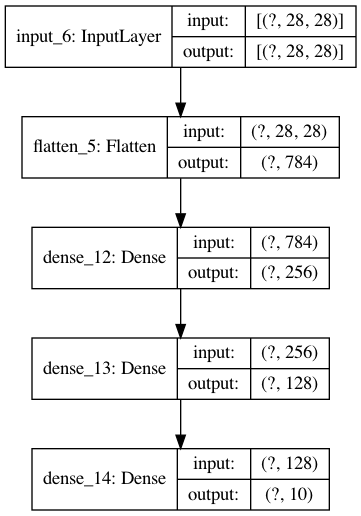

In [65]:
# 모델을 이미지로 보자 
from tensorflow.keras.utils import plot_model

# plot_model(model, to_file = 'model.png') # 파일로저장  
# plot_model(model)
plot_model(model, show_shapes = True) # input, output 에 대한 정보 보기위해 true설정 
# 앞에 물음표는 뭐야? 

# 2) 컴파일 단계 
- 구축된 모델에 추가 설정한다. 
    - 추가설정이란? 어떻게 학습할지에 대한 설정 
- 손실함수 
- Optimizer(최적화함수)
- 평가지표 

In [66]:
model.compile(
    optimizer = 'adam', # optimizer등록한다. 
    loss = 'categorical_crossentropy', # loss function 등록 한다.
    metrics = ['accuracy'] # 최종평가가 아니다. 평가지표이다. 트레인도중에 밸리데이션 결과를 확인한다. 
)

- 컴파일할때 optimizer, loss는 반드시 지정해줘야 한다. 
- metrics를 손실과 정확도 까지 보고 싶다면 지정한다. accuracy로 지정했는데 이는 최종평가가 아니다. 평가지표이다. 트레인 도중 밸리데이션 결과를 확인한다. 

# 3) X, y 데이터를 준비한다. 
- X
    - 0 ~ 1 사이의 값으로 정규화 시킨다. 
- y
    - one hot encoding 처리
    - tensorflow.keras 의 to_categorical() 함수 이용
    
- 정규화하기 위해서 255로 나눈다. 왜 255? 

In [67]:
# x 값을 Min, Max 스케일링 위해서 255로 나눈다. 
# min : 0, max : 255이기때문에 
X_train = X_train/255.
X_test = X_test/255.

X_train.min(), X_train.max()

(0.0, 1.0)

In [68]:
# y 값은 원핫인코딩한다.

y_train_ohe = keras.utils.to_categorical(y_train)
y_test_ohe = keras.utils.to_categorical(y_test)

In [69]:
y_train_ohe[:5] # 원핫인코딩된 y값 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [70]:
y_train_ohe.shape, y_test_ohe.shape # (6만개, 10개 컬럼) -->원핫인코딩해서 컬럼10개가 생김

((60000, 10), (10000, 10))

In [71]:
X_train.shape, X_test.shape # 

((60000, 28, 28), (10000, 28, 28))

# 3) 학습(fit) 

In [73]:
model.fit(X_train, y_train_ohe,
         epochs=10,  # 전체 트레인데이터셋을 1번 학습하는 것을 1에폭, 
         batch_size=100, # 파라미터 업데이터 (최적화)를 100개 마다 처리해라. 
         validation_split=0.2 # 검증용 데이터셋 80%는 학습 20%는 검증 
) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 113us/sample - loss: 0.2832 - accuracy: 0.9164 - val_loss: 0.1419 - val_accuracy: 0.9585
Epoch 2/10
48000/48000 [==============================] - 4s 87us/sample - loss: 0.1074 - accuracy: 0.9682 - val_loss: 0.1150 - val_accuracy: 0.9651
Epoch 3/10
48000/48000 [==============================] - 4s 83us/sample - loss: 0.0695 - accuracy: 0.9788 - val_loss: 0.1001 - val_accuracy: 0.9696
Epoch 4/10
48000/48000 [==============================] - 4s 84us/sample - loss: 0.0500 - accuracy: 0.9841 - val_loss: 0.0911 - val_accuracy: 0.9724
Epoch 5/10
48000/48000 [==============================] - 4s 87us/sample - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0844 - val_accuracy: 0.9762
Epoch 6/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0962 - val_accuracy: 0.9728
Epoch 7/10
48000/48000 [==============================]

- epochs : 전체 데이터를 학습하는 단위(?) 
    - 전체 트레인 데이터셋을 1번 학습하는 것을 1에폭이라 한다. 
    - 6만개를 1번 학습하는 것이 1에폭 --> 10번해라 60만개 학습 하게 된다. 
- batch_size : 
    - 파라미터 업데이터 ==> 최적화 하게 될때 100개 마다 처리해라. 
    - 트레인셋 6만개를 한번에 다 넣어서 학습하게 될 경우 --> 1배치 
    - 트레인셋 6만개를 100개로 나눠서 학습하게 될 경우 --> 100배치
    - 업데이트를 다 하게되면 1에폭이 된다 
    
- validation_split : 0.2로 설정하면 
    - 

결과를 보자 
- loss : 오차값 
- accuracy 는 metrics에 accuracy를 지정해줘서 나왔다. 
- 학습을 진행할수록 성능이 좋아진다. 
- 트레인은 계속 떨어지게 된다. 
- vali는 떨어졌다가 다시 올라가는 경우가있다. --> 
- 에폭도 하이퍼파라미터이다. 에폭은 충분히 늘려주는 것이 좋긴하다. 
- 해서 최적의 값을 찾아본다. (?) 
- 학습을 다시하면 11번째부터 시작하게 된다. 그래서 초기화 하려면 위에서 부터 다시해야한다. 

# 4) 테스트셋 평가 

In [79]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)
print(test_loss, test_acc) # accuracy는 metrics에서 지정해줘서 출력가능한 값 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10151282552356715 0.9748


# 5) 추론메소드 
- predict()
    - 각 클래스 별 확률 반환
- <del>predict_classes()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated 됨 --> 쓸수는 있지만 경고뜸 
    - 이거 대신 넘파이 argmax를 쓰면된다. 
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=-1)`
    - axis에 1줘도 되고 -1줘도 된다

In [81]:
X_test[:10].shape # 10개 이미지, 

(10, 28, 28)

In [84]:
y_test[:10] # 원래 값 

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [86]:
y_test_ohe[:10]
# max값(1)이 있는 위치의 인덱스 -> argmax 로 추출한다. 
# axis(방향)을 -1(마지막)로 준다. 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [89]:
import numpy as np 
np.argmax(y_test_ohe[:10], axis = -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [90]:
# 추론을 해보자 --> 클래스별 확률로 추론을 해보자. 
pred = model.predict(X_test[:10]) # 예측하고 싶은 애들을 넣어준다 

In [92]:
pred.shape # (10개이미지, 10개 클래스)

(10, 10)

In [95]:
np.round(pred,3) # 소수점 3자리까지 라운드해서 보자 
# 각각의 확률 

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.996, 0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.001, 0.   , 0.   , 0.811, 0.053, 0.   , 0.135,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ]], dtype=float32)

In [96]:
# 이건 뭘 의미하나 
np.argmax(pred, axis = -1) 

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [97]:
# 이건 뭘 의미하나 
model.predict_classes(X_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

- 왜 원핫인코딩 했나? 
    - 예측y값 - 실제y값 = 오차를 확인하기 위해서 그 오차를 확인하기 위해서 원핫인코딩하였다. 

# 최종 코드로보면

In [98]:
# 1) model 생성 
model = keras.Sequential() # 모델의 틀이 만들어졌다. 

# 층(layer)을 모델이 추가한다. 
model.add(keras.layers.Input((28,28))) # 입력레이어 : (28,28)이미지의 크기에 맞춰서 인풋을 넣을거다. 

# 여기서부터는 감춰졌다고 해서 히든 레이어라고 한다. 
model.add(keras.layers.Flatten()) # n차원배열을 1차원으로 만들기 
model.add(keras.layers.Dense(256, activation = 'relu')) #256 --> 로지스틱 리그레션을 256개를 만들어라
model.add(keras.layers.Dense(128, activation = 'relu')) # 128 --> 로지스틱 리그레션을 128개 만들어라 

model.add(keras.layers.Dense(10, activation = 'softmax')) # 마지막층 = 출력층, output layer , 10개의 확률을 맞춰야 하니 10개지

# 2) 모델컴파일
model.compile(
    optimizer = 'adam', # optimizer등록한다. 
    loss = 'categorical_crossentropy', # loss function 등록 한다.
    metrics = ['accuracy'] # 최종평가가 아니다. 평가지표이다. 트레인도중에 밸리데이션 결과를 확인한다. 
)

# 3) y값 원핫인코딩 처리  
X_train = X_train/255.
X_test = X_test/255.

y_train_ohe = keras.utils.to_categorical(y_train)
y_test_ohe = keras.utils.to_categorical(y_test)

# 4) 모델 학습 
model.fit(X_train, y_train_ohe,
         epochs=10,  # 전체 트레인데이터셋을 1번 학습하는 것을 1에폭, 
         batch_size=100, # 파라미터 업데이터 (최적화)를 100개 마다 처리해라. 
         validation_split=0.2 # 검증용 데이터셋 80%는 학습할때, 20%는 검증 할때 
) 

# 5) 손실 및 지표 확인 
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)
print(test_loss, test_acc) # accuracy는 metrics에서 지정해줘서 출력가능한 값 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 109us/sample - loss: 1.1205 - accuracy: 0.6506 - val_loss: 0.5527 - val_accuracy: 0.8428
Epoch 2/10
48000/48000 [==============================] - 5s 95us/sample - loss: 0.4677 - accuracy: 0.8645 - val_loss: 0.3738 - val_accuracy: 0.8913
Epoch 3/10
48000/48000 [==============================] - 5s 98us/sample - loss: 0.3678 - accuracy: 0.8940 - val_loss: 0.3182 - val_accuracy: 0.9076
Epoch 4/10
48000/48000 [==============================] - 5s 100us/sample - loss: 0.3278 - accuracy: 0.9052 - val_loss: 0.2943 - val_accuracy: 0.9159
Epoch 5/10
48000/48000 [==============================] - 5s 110us/sample - loss: 0.3009 - accuracy: 0.9125 - val_loss: 0.2693 - val_accuracy: 0.9223
Epoch 6/10
48000/48000 [==============================] - 6s 120us/sample - loss: 0.2790 - accuracy: 0.9198 - val_loss: 0.2545 - val_accuracy: 0.9260
Epoch 7/10
48000/48000 [============================

0.20622208559513092 0.939


# ========65일 03_신경망구조 =====
- 1회차 : 0425 


- 거의 이론적인 내용들이 많아서 필기내용 참고
- 딥러닝 네트워크 구성요소 
- 1) 유닛, 노드, 뉴런 , activation function, 
- 2) layer 
- 3) 활성함수란? 활성함수의 역할?
- 4) 옵티마이저(최적화) 
    - 그래디언트 디센트 (경사하강법) 
    - 오차역전파

# ========== 66일 03_신경망 구조 [파라미터 업데이터 단위 ~ ]==========
- 수업 : 4월19일
- 복습 : 1회(4월28일)

# 목차 
## 66.1 신경망 구성요소 , 딥러닝 프로세스 
### 66.1.1 유닛, 노드, 뉴런
### 66.1.2 레이어, 층
### 66.1.3 모델, 네트워크 

## 66.2 활성함수 
### 66.2.1 시그모이드함수 ==> 이진분류 출력층  
### 66.2.2 하이퍼볼릭 탄젠트 ==> 출력층 (사용잘안함)
### 66.2.3 렐루 ==> 히든레이어 
### 66.2.4 leaky Relu ==> 히든레이어 
### 66.2.5 softmax ==> 다중분류 출력층 

--> 이부분은 fit할때 들어가는 설정값들 
## 66.3 loss  
### 66.3.1 이진분류 --> binary_crossentropy
### 66.3.2 다중클래스분류 --> categorical_crossentropy
### 66.3.3 회귀 --> mean squared error --> mse 

## 66.5 옵티마이저 <-- 가중치 업데이트를 위한 최적화 
### 66.5.1 경사하강법() 
    - 1) Batch Gradient Decent (배치 경사하강법)
    - 2) Mini Batch Stochastic Gradient Decent (미니배치 확률적 경사하강법)
### 66.5.2 오차역전파
### 66.5.3 주요옵티마이저 


## 66.4 metrics  

# =============== 67일 04_ DNN_분류_회귀====================
- 수업  : 
- 복습  : 1회(4월29일)


- 1교시 : 04_복습
- 2교시 : 04_다중분류_FashionMNIST(MNIST) Dataset 부터 
- 3교시 : 04_다중분류_FasionMNIST_모델구현부터결과시각화까지
- 4교시 : 04_이진분류\_IMDB감정분석_
- 5교시 : 04_이진분류_IMDB감정분석_하이퍼파라미터
- 6교시 : 05_DNN성능개선_
- 7교시 : 05_DNN성능개선소스

# 목차 
## 67.1 데이터셋 --> tf.data.dataset 


# 질문 
- 셔플할때 결과가 이해가 잘 안되는데, 지정한 갯수만큼 크기만큼 섞는다? 
- 배치는 주로 어떨때 사용하나? 배치의 용도는 무엇인ㄱ? 

# ------ 7교시  성능개선 소스코드 ---------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 평가지표 그래프를 함수로 만들어서 호출하도록 하자 
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='train_loss')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='validation_loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymin!=None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1,N_EPOCHS+1), history.history['accuracy'], label='train_accuracy')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_accuracy'], label='validation_accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymin!=None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [21]:
# 1. 데이터 로딩 및 데이터셋 생성 
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS,drop_remainder=True).repeat()
validataion_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [32]:
#2. 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS= 20
N_BATCHS = 100 

N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10

steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

In [33]:
# 3. 전처리 
# x값
X_train = train_image/255
X_test = test_image/255

# y : 원핫인코딩 
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

# 1) 모델의 크기 변경

In [34]:
# 작은 모델을 만들어보자. 작은모델? 레이어층이나 유닛수가 적은 것 
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(8, activation='relu'))# hidden
    model.add(keras.layers.Dense(N_CLASS, activation='softmax')) # out 
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [35]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 학습
history = model.fit(train_dataset,
             epochs=N_EPOCHS,
             steps_per_epoch=steps_per_epoch,
             validation_data=validataion_dataset,
             validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2424 - accuracy: 0.9330 - val_loss: 0.2639 - val_accuracy: 0.9290
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2414 - accuracy: 0.9336 - val_loss: 0.2640 - val_accuracy: 0.9289
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2399 - accuracy: 0.9341 - val_loss: 0.2644 - val_accuracy: 0.9298
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2388 - accuracy: 0.9348 - val_loss: 0.2609 - val_accuracy: 0.9290
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2373 - accuracy: 0.9348 - val_loss: 0.2606 - val_accuracy: 0.9300
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.2360 - accuracy: 0.9353 - val_loss: 0.2646 - val_accuracy: 0.9285
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.2350 - accuracy: 0.9353 - va

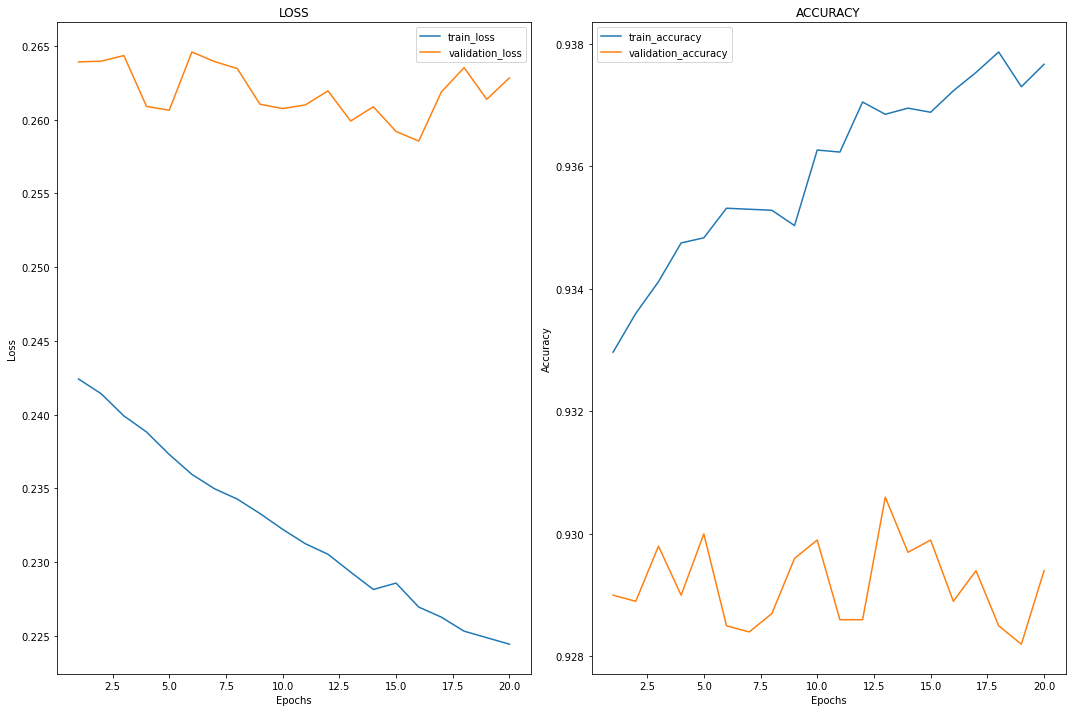

In [39]:
plot_result(history)

# 2) 큰모델을 만들어보자 
- 이전 결과에서 과소적합이 나왔으니 모델을 크게 만들어보자
- 그래프를 보고 늘려야하는지 줄여야하는지 등 형태를 익히는 것이 좋다. 경험치 ㄱ쌓아야함 

In [40]:
#히든레이어 : 4개 - 256, 256, 128, 128 
def create_model2():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))# hidden
    model.add(keras.layers.Dense(256, activation='relu'))# hidden
    model.add(keras.layers.Dense(128, activation='relu'))# hidden
    model.add(keras.layers.Dense(128, activation='relu'))# hidden
    model.add(keras.layers.Dense(N_CLASS, activation='softmax')) # out 
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [42]:
model = create_model2()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [43]:
# 학습
history = model.fit(train_dataset,
             epochs=N_EPOCHS,
             steps_per_epoch=steps_per_epoch,
             validation_data=validataion_dataset,
             validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2516 - accuracy: 0.9255 - val_loss: 0.1121 - val_accuracy: 0.9644
Epoch 2/20
600/600 [==============================] - 11s 18ms/step - loss: 0.0953 - accuracy: 0.9700 - val_loss: 0.0935 - val_accuracy: 0.9709
Epoch 3/20
600/600 [==============================] - 11s 19ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0886 - val_accuracy: 0.9725
Epoch 4/20
600/600 [==============================] - 12s 19ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 5/20
600/600 [==============================] - 11s 19ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0743 - val_accuracy: 0.9789
Epoch 6/20
600/600 [==============================] - 12s 20ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0778 - val_accuracy: 0.9797
Epoch 7/20
600/600 [==============================] - 12s 19ms/step - loss: 0.0281 - accurac

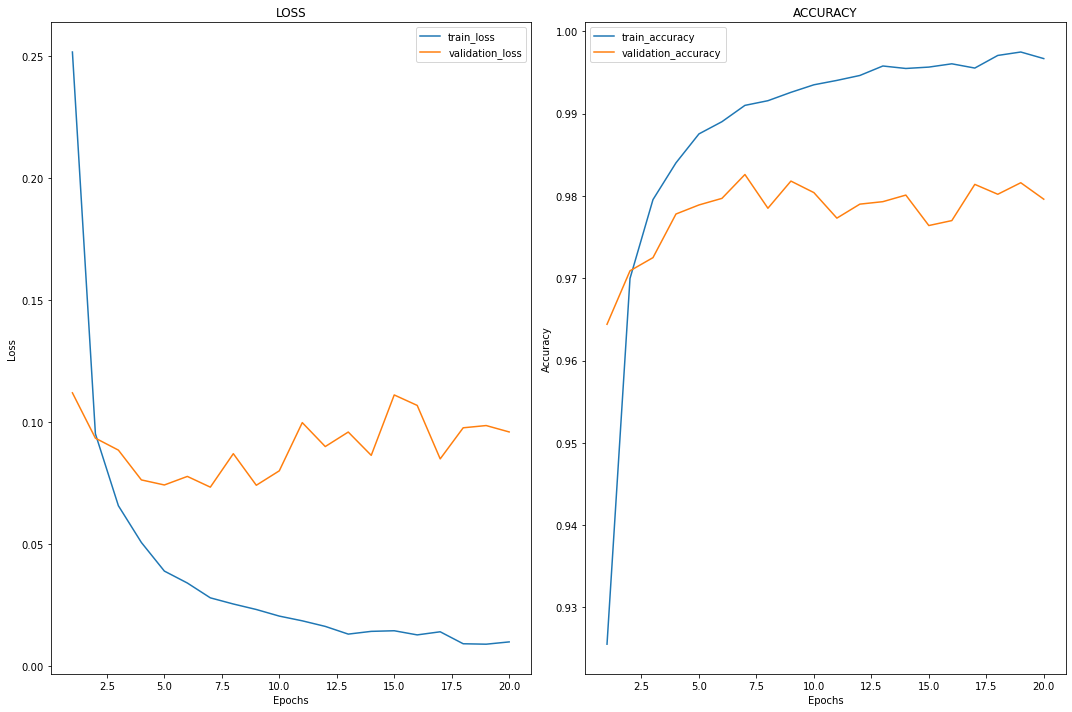

In [44]:
plot_result(history)

- 처음 학습 정확도를 보면 (1)번 모델보다 훨씬 더 잘나오고 있다라는 것을 알수 있다. 
- 에폭을 더 돌려야 좀 더 잘 알수 있다. 최소 100번이상은(?) 돌려야 한다? 
- 딥러닝은 계산을 통해서, 규칙을 통해서 찾아내는 것보다 실험을 많이 해보면서 알아가는 것들이 많다.
- 모양과 지표도 볼줄 알아야 한다. 
- 많이 해봐야 감이 생긴다. 

# =============== 68일차(04/21/수) ===============
- 수업 : 4월21일(수)
- 복습 : 


- 1교시 : 복습 및 코랩소개
- 2교시 : 코랩 구글 드라이브 연동하기
- 3교시 :
- 4교시 :
- 5교시 :
- 6교시 :
- 7교시 :

## 2교시 - 코랩 구글 드라이브 연동하기 
- 